In [13]:
import pandas as pd

LABELED_PATH = "../data/processed/wintermute_transfers_clean_defi.parquet"  # adjust if you used .csv
df_defi = pd.read_parquet(LABELED_PATH)
display(df_defi.shape)
display(df_defi.info())

(365942, 11)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365942 entries, 0 to 365941
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   timestamp     365942 non-null  object 
 1   from_address  365942 non-null  object 
 2   from_entity   365942 non-null  object 
 3   to_address    365942 non-null  object 
 4   to_entity     365942 non-null  object 
 5   token         365942 non-null  object 
 6   value         365942 non-null  float64
 7   usd           365942 non-null  float64
 8   tx_hash       365942 non-null  object 
 9   chain         365942 non-null  object 
 10  block_number  365942 non-null  float64
dtypes: float64(3), object(8)
memory usage: 30.7+ MB


None

# Frquency Top 10

,token,tx_count
0,USDC,108598
1,WSOL,96220
2,SOL,47722
3,WETH,39394
4,USDT,16765
5,WBTC,12532
6,cbBTC,8854
7,ARB,5166
8,WBNB,2765
9,JUP,2442


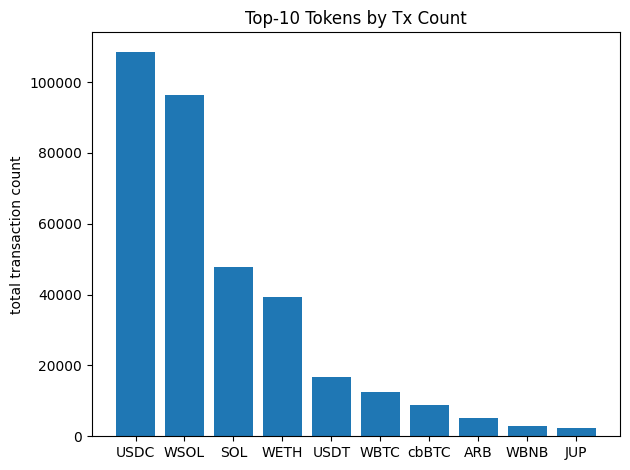

In [14]:
import matplotlib.pyplot as plt

top_freq = (
    df_defi["token"]
    .value_counts()
    .head(10)
    .rename_axis("token")
    .reset_index(name="tx_count")
)
display(top_freq)

plt.bar(top_freq['token'],top_freq['tx_count'])
plt.ylabel("total transaction count")
plt.title("Top-10 Tokens by Tx Count")
plt.tight_layout()

# Volume top-10

In [15]:
top_vol = (
    df_defi.groupby("token")['value'].apply(pd.DataFrame).abs().sum()
    .sort_values(ascending=False)
    .head(10)
    .rename_axis("token")
    .reset_index(name="raw_volume")
)
display(top_vol)

,token,raw_volume
0,BabyDoge,8.302886e+13
1,Mog,1.432663e+12
2,PEPE,3.311216e+11
3,Bonk,6.427996e+10
4,SHIB,3.800477e+10
5,CAT,2.325998e+10
6,WEN,1.668027e+09
7,APU,6.410840e+08
8,Neiro,4.533176e+08
9,USDC,2.993266e+08


,token,raw_volume_usd
0,USDC,2.993269e+08
1,WETH,2.477306e+08
2,USDT,9.378965e+07
3,WSOL,9.209269e+07
4,WBTC,6.397097e+07
5,cbBTC,5.757610e+07
6,ETH,5.552241e+07
7,SOL,2.357058e+07
8,WBNB,1.004289e+07
9,BTCB,7.235141e+06


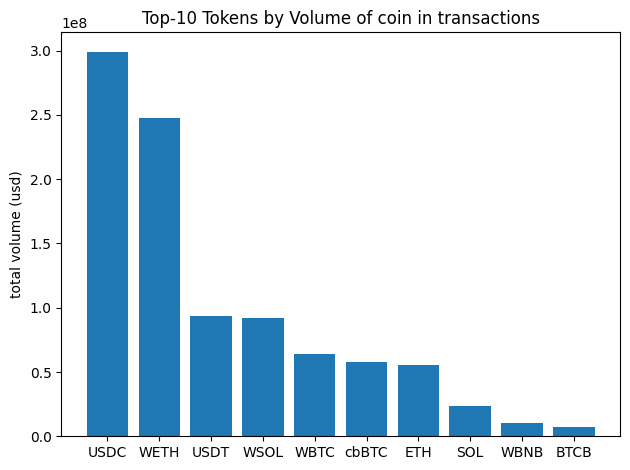

In [16]:
top_vol_usd = (
    df_defi.groupby("token")['usd'].apply(pd.DataFrame).abs().sum()
    .sort_values(ascending=False)
    .head(10)
    .rename_axis("token")
    .reset_index(name="raw_volume_usd")
)
display(top_vol_usd)

plt.bar(top_vol_usd['token'],top_vol_usd['raw_volume_usd'])
plt.ylabel("total volume (usd)")
plt.title("Top-10 Tokens by Volume of coin in transactions")
plt.tight_layout()

# Chain Top-10

,chain,chain_count
0,solana,250403
1,arbitrum_one,65447
2,base,20845
3,ethereum,18575
4,bsc,7346
5,optimism,3325
6,avalanche,1


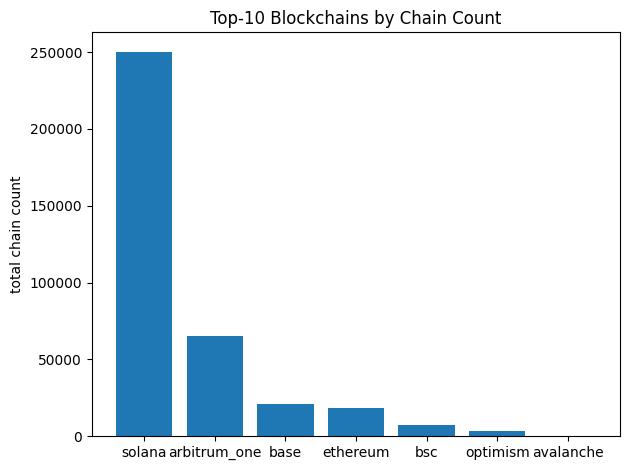

In [17]:
top_chain = (
    df_defi["chain"]
    .value_counts()
    .head(10)
    .rename_axis("chain")
    .reset_index(name="chain_count")
)
display(top_chain)

plt.bar(top_chain['chain'],top_chain['chain_count'])
plt.ylabel("total chain count")
plt.title("Top-10 Blockchains by Chain Count")
plt.tight_layout()

# Protocal Top-10

,entity,entity_count
0,Uniswap,153
1,Raydium,75
2,Meteora (Prev. Mercurial),74
3,Orca,68
4,PancakeSwap,33
5,Aerodrome Finance,19
6,Phoenix,11
7,SushiSwap,9
8,Jito,8
9,Lifinity,6


([<matplotlib.patches.Wedge at 0x167ac6d10>,
 [Text(0.5434239046809062, 0.9563945105558467, 'Uniswap'),
  Text(-0.9563945105558467, 0.5434239046809063, 'Raydium'),
  Text(-0.960115665402366, -0.5368220459788998, 'Meteora (Prev. Mercurial)'),
  Text(-0.09083724220568634, -1.0962429454406837, 'Orca'),
  Text(0.6330017251714376, -0.8996159268987983, 'PancakeSwap'),
  Text(0.9082523621967902, -0.6205462485294314, 'Aerodrome Finance'),
  Text(1.0162674980787743, -0.42095174586727735, 'Phoenix'),
  Text(1.064454619372721, -0.27737404942798094, 'SushiSwap'),
  Text(1.0895742964826354, -0.15108888921548916, 'Jito'),
  Text(1.0990603352760397, -0.04545744628682283, 'Lifinity')])

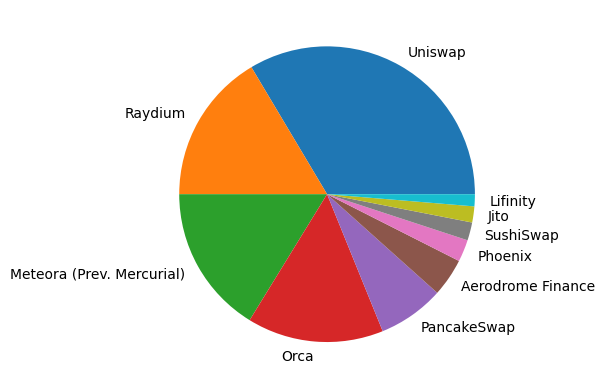

In [18]:
df_defi_from = df_defi[df_defi['from_entity']!='Wintermute'][['from_address','from_entity']]
df_defi_from = df_defi_from.rename(columns={"from_address": "address", "from_entity": "entity"})

df_defi_to = df_defi[df_defi['to_entity']!='Wintermute'][['to_address','to_entity']]
df_defi_to = df_defi_to.rename(columns={"to_address": "address", "to_entity": "entity"})

df_defi_non_wintermute = (
    pd.concat([df_defi_from, df_defi_to], ignore_index=True)
      .drop_duplicates(subset=["address"])      # keep the first entity you see
      .reset_index(drop=True)
      .sort_values('entity')
)
df_defi_non_wintermute.value_counts(subset=['entity'])
top_protocol = (
    df_defi_non_wintermute["entity"]
    .value_counts()
    .head(10)
    .rename_axis("entity")
    .reset_index(name="entity_count")
)
display(top_protocol)
entity_list = top_protocol['entity'].values.tolist()
plt.pie(top_protocol['entity_count'],labels=entity_list)

# Temporal Trends

In [19]:
display(df_defi['timestamp'].min())
display(df_defi['timestamp'].max())

'2025-04-08 01:30:11+00:00'

'2025-04-08 12:49:57+00:00'

In [20]:
df_defi['timestamp'] = pd.to_datetime(df_defi["timestamp"],  utc=True, errors="coerce")
df_defi = df_defi.set_index("timestamp").sort_index()

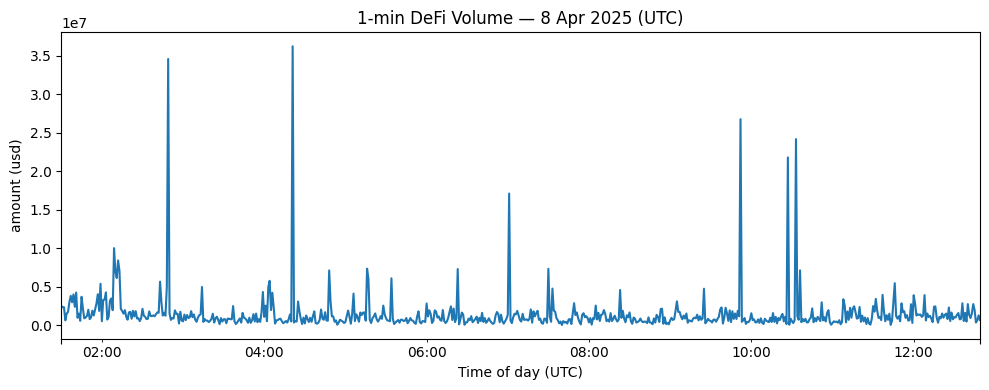

In [21]:
vol_1m = df_defi["usd"].abs().resample("1min").sum()
vol_1m.plot(figsize=(10,4), title="1-min DeFi Volume — 8 Apr 2025 (UTC)")
plt.ylabel("amount (usd)")
plt.xlabel("Time of day (UTC)")
plt.tight_layout()
plt.savefig("../outputs/vol_1m.png", dpi=150)

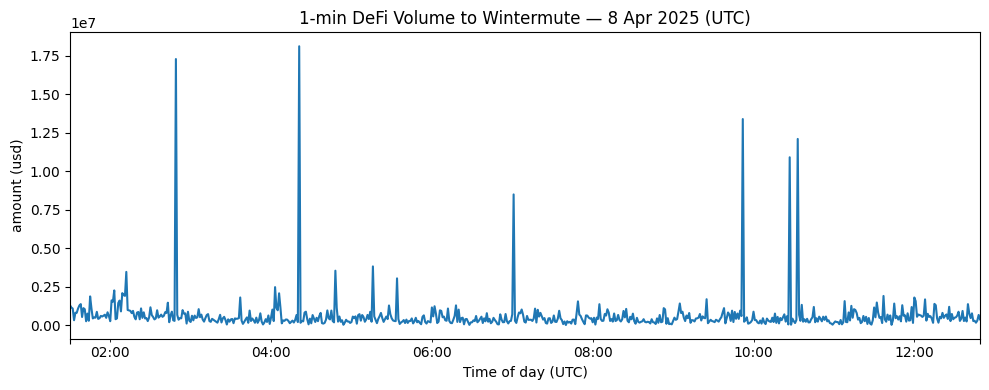

In [22]:
df_defi_from_full = df_defi[df_defi['from_entity']!='Wintermute']
vol_from_1m = df_defi_from_full["usd"].abs().resample("1min").sum()
vol_from_1m.plot(figsize=(10,4), title="1-min DeFi Volume to Wintermute — 8 Apr 2025 (UTC)")
plt.ylabel("amount (usd)")
plt.xlabel("Time of day (UTC)")
plt.tight_layout()
plt.savefig("../outputs/vol_from_1m.png", dpi=150)

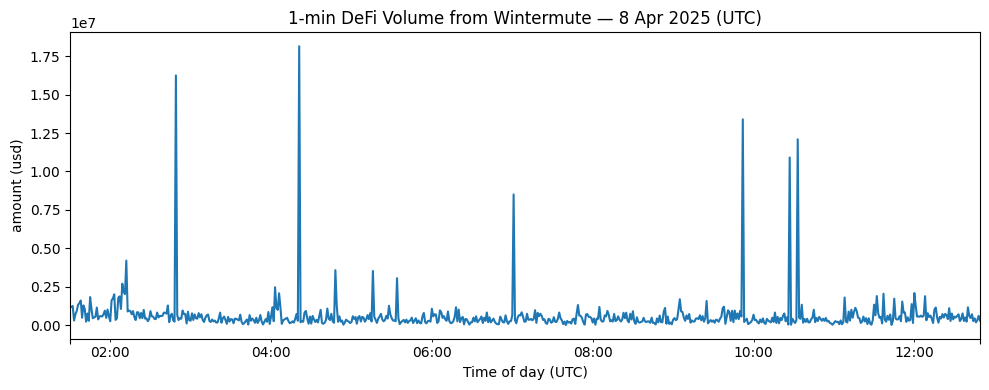

In [23]:
df_defi_to_full = df_defi[df_defi['to_entity']!='Wintermute']
vol_to_1m = df_defi_to_full["usd"].abs().resample("1min").sum()
vol_to_1m.plot(figsize=(10,4), title="1-min DeFi Volume from Wintermute — 8 Apr 2025 (UTC)")
plt.ylabel("amount (usd)")
plt.xlabel("Time of day (UTC)")
plt.tight_layout()
plt.savefig("../outputs/vol_to_1m.png", dpi=150)

- Baseline being non-zero positive values around 1e6 usd showing activity of market making strateigies.
- Huge spikes for each 45min to 1h. Half from Wintermute and the other half to Wintermute. This could mean either huge opportunities occured for market making strategies or a portfolio rebalancing conducted in regular times.

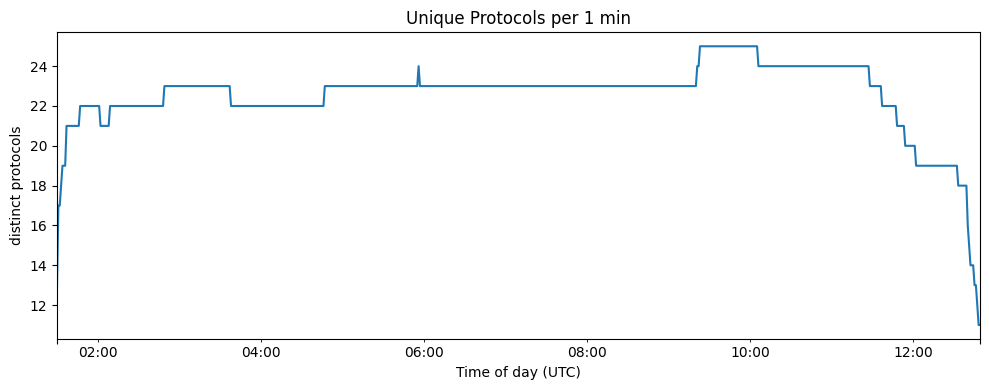

In [24]:
proto_1m = (
    df_defi.groupby("from_entity")["usd"]              
      .resample("1min")                          
      .size()                                   
      .reset_index(name="txs")
      .set_index("timestamp")                   
      .resample("1min")["from_entity"]                
      .nunique()                                
)
proto_1m.plot(figsize=(10,4), title="Unique Protocols per 1 min")
plt.ylabel("distinct protocols")
plt.xlabel("Time of day (UTC)")
plt.tight_layout()
plt.savefig("../outputs/unique_proto_1m.png", dpi=150)

- Increase in distinct protocols from 01:00
- Decrease in distinct protocols from 12:00
- However, there is no difference in baseline of the volume of trading in usd in increasing or decreasing distinct protocols

# Plan
1. Intraday Volume by Blockchain: Wintermute's activity per chain may highlight which ecosystems had the most arbitrage or liquidity needs. Sudden volume surges on a particular chain might indicate chain-specific events or opportunities
2. Volume Breakdown by Category (Stacked Bar/Area): It can reveal if most volume comes from trades, liquidity moves, or lending activity, each carrying different market microstrcutre clues
3. Trade Size Distribution (Histogram): A frequency histogram of usd per transfer shows whether activity is mostly many small trades or dominated by a few large trades.
4. Trade Count and Size by Time of Day (Hourly Trends): By examining how trading frequency and average size evolve hourly, we can infer behavioral patterns like do many small strades occur during certain hours.
5. Volume by Chain vs Time of Day (Heatmap): A heatmap of volume traded for each chain by time block captures multi-dimensional activity in one view. 
6. Protocol vs Token Volume Matrix: This analysis cross-tabulates protocols against token symbols to see which tokens are primarily traded on which protocols.
7. Wintermute Flow Sankey (Wintermute -> Protocol -> Token): A Sankey diagram visualizes the flow of volume from Wintermute to various protocols and then into specific tokens
8. Trade Sizes by Protocol/Category (Box Plot): Comparing distributions of usd by category or by entity can expose different trade size profile. 
9. Trade Inter-Arrivial Times (Activity Burst Analysis): 
10. Stablecoin vs Non-Stablecoin Volume
11. Next Steps: From EDA to Strategy Design